# The Wave Equation in 1D

This notebook solves the wave equation in 1D and animates the resulting solution.

The classical wave equation one dimension and Cartesian coordinates is
$$
\frac{\partial^2 \phi}{\partial^2 t} - c^2\frac{\partial^2 \phi}{\partial^2 x} = 0,
$$
where $c$ is the wave speed. To simplify the notation, we write define the notation
that
$$
\phi_{,t} \equiv \frac{\partial \phi}{\partial t}.
$$

To solve this equation numerically, we rewrite this 
second-order equation as first-order differential equations.  
Let's define the first order variables
\begin{align}
\Pi &= \phi_{,t}\\
\Phi &= \phi_{,x},
\end{align}
then the wave equation can be written
$$
\Pi_{,t} = c^2\Phi_{,x}.
$$
A second equation comes from the integration condition that mixed partial derivatives
commute
$$
\frac{\partial^2 \phi}{\partial t \partial x} = \frac{\partial^2 \phi}{\partial x \partial t}.
$$
In first-order form, this condition is
$$
\Phi_{,t} = \Pi_{,x}.
$$
The system of equations that we will solve is
\begin{align}
\Pi_{,t} &= c\Phi_{,x}\\
\Phi_{,t} &= \Pi_{,x}.
\end{align}



In [1]:
using Printf
using Plots

In [2]:
push!(LOAD_PATH,"../src/wave1D")
using Wave1D

    Updating registry at `C:\Users\jambl\.julia\registries\General.toml`
   Installed DifferentialEquations ──────────── v7.13.0
   Installed StatsFuns ──────────────────────── v1.3.1
   Installed TimerOutputs ───────────────────── v0.5.24
   Installed Polyester ──────────────────────── v0.7.14
   Installed OffsetArrays ───────────────────── v1.14.0
   Installed Accessors ──────────────────────── v0.1.36
   Installed StaticArrays ───────────────────── v1.9.4
   Installed Sundials_jll ───────────────────── v5.2.2+0
   Installed NonlinearSolve ─────────────────── v3.11.0
   Installed RecursiveArrayTools ────────────── v3.19.0
   Installed MaybeInplace ───────────────────── v0.1.2
   Installed FunctionWrappers ───────────────── v1.1.3
   Installed TriangularSolve ────────────────── v0.2.0
   Installed IntelOpenMP_jll ────────────────── v2024.1.0+0
   Installed Static ─────────────────────────── v0.8.10
   Installed RandomNumbers ──────────────────── v1.5.3
   Installed SLEEFPirates ──────

### Set simulation parameters here

- `nt` = number of time steps 
- `nx` = number of points in space
- `cfl` = Courant condition,  dt = cfl * dx
- `bbox` = [xmin, xmax]
- `outfreq` = frequency of output in movie

In [3]:
nt = 1200
nx = 101
cfl = 0.2
bbox = [0.0, 20.0]
outfreq = 2

2

### Set up the grid

- `Grid` = This defines the base grid
- `GridFields` = This allocates 2 functions on the grid

In [4]:
grid = Wave1D.Grid(nx, bbox, cfl)
fields = Wave1D.GridFields(2, grid);

### Set intial data

- Here time is set to the initial time
- The user provides a routine to set initial data

In [5]:
time = [0.0]
Wave1D.init_data!(fields)

### Evolution

To animate the solution, create an animation object

    a = Animation()
    
Then save frames to the animation object

    frame(a, plt)
    
Finally, construct a gif and mp4 from `a`

In [6]:
function analytic(x::Array, t::Float64) 
    vals = Array{Float64}(undef, length(x))
    for i in 1:length(x)
        vals[i] = exp(-(t + x[i])^2)*(-t-x[i]+exp(4*t*x[i])*(x[i]-t))
    end
    return vals  
    
end

analytic (generic function with 1 method)

In [7]:
x = fields.grid.x
a = Animation()
xrange = (bbox[1],bbox[2])
yrange = (-10.0,10.0)

for i = 1:nt
    #println("Step ",time[1])
    Wave1D.rk4_step!(Wave1D.waveEqs!, fields, time)
    if mod(i,outfreq)==0
        # Pi Plots
        plt = plot(x, fields.u[1], xlim=xrange, ylim=yrange, label="Pi", color = :blue)
        plt = scatter!(x, fields.u[1], label=" ", color=:yellow)

        # Phi Plots
        # plt = plot!(x, fields.u[2], xlim=xrange, ylim=yrange, label="Phi", color = :red)
        # plt = scatter!(x, fields.u[2], label=" ", color=:green)

        # dPi Plots
        # plt = plot!(x, fields.dxu[1], xlim=xrange, ylim=yrange, label="dxPi", color = :blue)
        # plt = scatter!(x, fields.dxu[1], label=" ", color=:yellow)

        # dPhi Plots
        # plt = plot!(x, fields.dxu[2], xlim=xrange, ylim=yrange, label="dxPhi", color = :red)
        # plt = scatter!(x, fields.dxu[2], label=" ", color=:green)

        # Error/Analytic Solution Plots
        plt = plot!(x, analytic(x, time[1]), xlim=xrange, ylim=yrange, label="True", color = :green)
        plt = plot!(x, fields.u[1]-analytic(x, time[1]), xlim=xrange, ylim=yrange, label="Error", color = :red)
        
        frame(a, plt)
    end
end

[ Info: Saved animation to C:\Users\jambl\OneDrive - Brigham Young University\Desktop\Research\Dr.Hirschmann\HirschmannGroupBYU\Code\Nate Numex\numex.jl-main\examples\Pi.gif


Plots.AnimatedGif("C:\\Users\\jambl\\OneDrive - Brigham Young University\\Desktop\\Research\\Dr.Hirschmann\\HirschmannGroupBYU\\Code\\Nate Numex\\numex.jl-main\\examples\\Pi.gif")
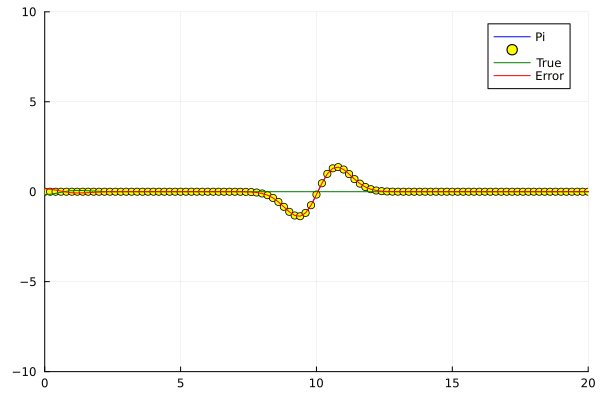

In [8]:
#Create a GIF
gif(a, "Pi.gif")

In [9]:
# Create MP4
mp4(a,"Pi.mp4")

[ Info: Saved animation to C:\Users\jambl\OneDrive - Brigham Young University\Desktop\Research\Dr.Hirschmann\HirschmannGroupBYU\Code\Nate Numex\numex.jl-main\examples\Pi.mp4


Plots.AnimatedGif("C:\\Users\\jambl\\OneDrive - Brigham Young University\\Desktop\\Research\\Dr.Hirschmann\\HirschmannGroupBYU\\Code\\Nate Numex\\numex.jl-main\\examples\\Pi.mp4")